# FAOSTAT Temperature Change
- Data description
  1) The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The      current dissemination covers the period 1961–2023. Statistics are available for monthly, seasonal and annual mean temperature    anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available. Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS).

- Content

 1) Code - Number of countries/areas covered: In 2019: 190 countries and 37 other territorial entities.
 2) Time coverage: 1961-2023
 3) Periodicity: Monthly, Seasonal, Yearly
 4) Base period: 1951-1980
 5) Unit of Measure: Celsius degrees °C
 6) Reference period: Months, Seasons, Meteorological year

- Inspiration

  1) Climate change is one of the important issues that face the world in this technological era. The best proof of this situation is the       historical temperature change. You can investigate if any hope there is for stopping global warming)

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
from prophet import Prophet

In [ ]:
df = pd.read_csv('/Users/briankimanzi/Documents/programming Languages/PythonProgramming/JupyterNoteBook/Datasets/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='' )
df

In [102]:
dfCopy = df.copy()
dfCopy

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [20]:
# Checking insight on the data
def Info(df):
    print("-----------------------shape---------------------")
    print(dfCopy.shape)
    print()
    print("------------------------info---------------------")
    print(dfCopy.info())
    print()
    print("-----------------------Describe------------------")
    print(dfCopy.describe())
    print()
    print("-----------------------Null Values ---------------")
    print(dfCopy.isna().sum())
    print()
    print("------------------------columns-------------------")
    print(dfCopy.columns)
Info(dfCopy)

-----------------------shape---------------------
(9656, 66)

------------------------info---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1

In [103]:
# Dropping Unnecessry columns
dfCopy.drop(columns=['Area Code', 'Months Code', 'Element Code'], axis=1, inplace=True)

In [1]:
# replacing symbols in the dataset
def replace(x):
    """This function performs something"""
    return x.str.replace("", "-")
dfCopy['Months'] = replace(dfCopy['Months'])

NameError: name 'dfCopy' is not defined

In [27]:
# create a dict for the Africa countries
dfCopy['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

In [105]:
dfCopy = dfCopy.loc[dfCopy['Element'] == 'Temperature change']

In [106]:
# groupby the numerical values only
dfCopy = dfCopy.groupby('Area').mean(numeric_only=True)

In [107]:
dfCopy  = dfCopy.loc[:,'Y1961':]

In [108]:
dfCopy = pd.DataFrame(dfCopy.mean()).reset_index(drop=False)
dfCopy.columns = ['ds', 'y']

In [109]:
dfCopy

,ds,y
0,Y1961,0.143032
1,Y1962,-0.028398
2,Y1963,-0.026297
3,Y1964,-0.122865
4,Y1965,-0.224154
5,Y1966,0.095070
6,Y1967,-0.131975
7,Y1968,-0.167841
8,Y1969,0.105694
9,Y1970,0.072189


In [111]:
# removing the y in Year
dfCopy['ds'] = dfCopy['ds'].apply(lambda x: x[1:]).astype(int)

In [112]:
dfCopy

,ds,y
0,1961,0.143032
1,1962,-0.028398
2,1963,-0.026297
3,1964,-0.122865
4,1965,-0.224154
5,1966,0.095070
6,1967,-0.131975
7,1968,-0.167841
8,1969,0.105694
9,1970,0.072189


Text(0, 0.5, 'Temperature Changes (℃)')

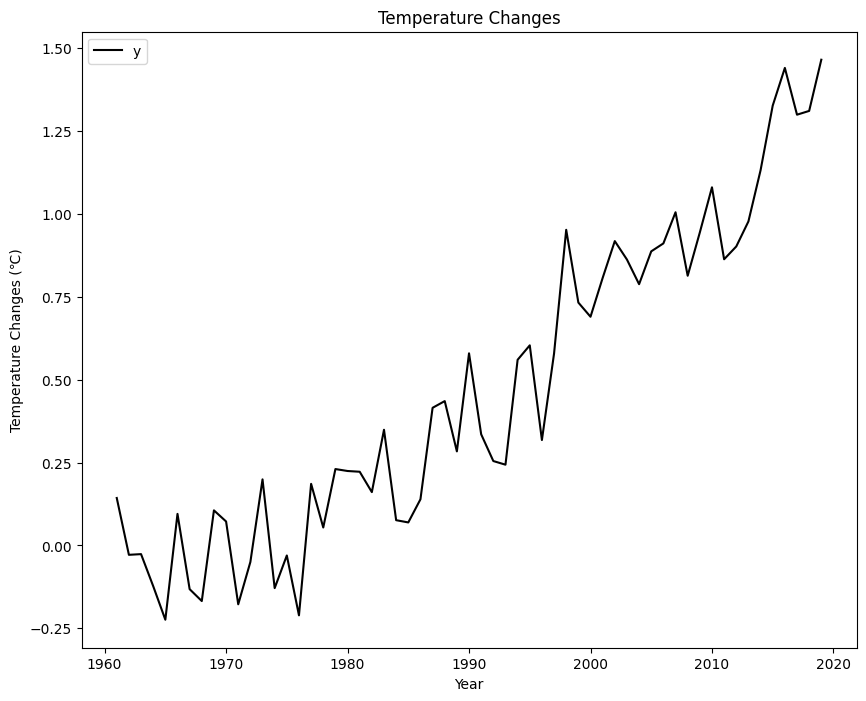

In [114]:
fig = dfCopy.plot(kind='line',x='ds', y='y', figsize=(10,8), color='black')
fig.set_title('Temperature Changes')
fig.set_xlabel('Year', fontsize=10)
fig.set_ylabel('Temperature Changes (℃)', fontsize=10)

In [115]:
# Traing and Testing the data
train = dfCopy.iloc[:44,].copy()
test = dfCopy.iloc[44:,].copy()

In [116]:
insample = Prophet()
insample.fit(train)

07:58:35 - cmdstanpy - INFO - Chain [1] start processing
07:58:45 - cmdstanpy - INFO - Chain [1] done processing


In [117]:
inforecast = insample.predict(test).loc[:,['ds', 'yhat']]
inforecast['ds'] = inforecast['ds'].apply(lambda x: x.year)
inforecast

,ds,yhat
0,2005,0.811440
1,2006,0.809407
2,2007,0.796937
3,2008,0.774072
4,2009,0.901347
5,2010,0.899313
6,2011,0.886843
7,2012,0.863978
8,2013,0.991253
9,2014,0.989220


In [118]:
inresult = dfCopy.merge(inforecast, on='ds', how='left')

/var/folders/6w/_1xx55992tqfg37yz_8bt5v80000gn/T/ipykernel_84554/164121610.py:10: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



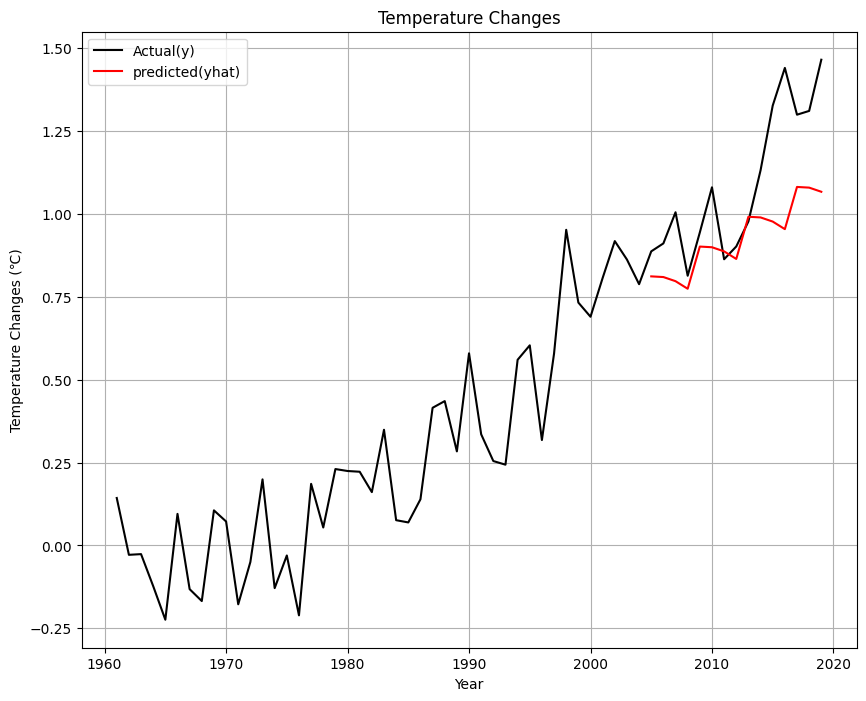

In [126]:
# ploting both the current  and the predicted
fig, ax = plt.subplots(figsize=(10, 8))

inresult.plot(kind='line', x='ds', y='y', label='Actual(y)', color='black', ax=ax)
inresult.plot(kind='line', x='ds', y='yhat', label='predicted(yhat)', color='red', ax=ax)
ax.set_title('Temperature Changes')
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Temperature Changes (℃)', fontsize=10)
ax.grid(True)
fig.show()

In [127]:
# creating a future dataframe
future = pd.DataFrame(np.arange(2020, 2070),columns=['ds'])
future

,ds
0,2020
1,2021
2,2022
3,2023
4,2024
5,2025
6,2026
7,2027
8,2028
9,2029


In [128]:
outSample = Prophet()
outSample.fit(dfCopy)

09:40:14 - cmdstanpy - INFO - Chain [1] start processing
09:40:15 - cmdstanpy - INFO - Chain [1] done processing


In [129]:
outForecast = outSample.predict(future).loc[:,['ds', 'yhat']]
outForecast

,ds,yhat
0,2020-01-01,1.216595
1,2021-01-01,1.328158
2,2022-01-01,1.354660
3,2023-01-01,1.354065
4,2024-01-01,1.326409
5,2025-01-01,1.437972
6,2026-01-01,1.464474
7,2027-01-01,1.463879
8,2028-01-01,1.436223
9,2029-01-01,1.547786


In [130]:
# Change the date format to be only year
outForecast['ds'] = outForecast['ds'].apply(lambda x: x.year)
outForecast

,ds,yhat
0,2020,1.216595
1,2021,1.328158
2,2022,1.354660
3,2023,1.354065
4,2024,1.326409
5,2025,1.437972
6,2026,1.464474
7,2027,1.463879
8,2028,1.436223
9,2029,1.547786


In [131]:
outResult = pd.concat([dfCopy, outForecast], axis=0)
outResult

,ds,y,yhat
0,1961,0.143032,NaN
1,1962,-0.028398,NaN
2,1963,-0.026297,NaN
3,1964,-0.122865,NaN
4,1965,-0.224154,NaN
...,...,...,...
45,2065,NaN,2.536113
46,2066,NaN,2.562615
47,2067,NaN,2.562021
48,2068,NaN,2.534365


/var/folders/6w/_1xx55992tqfg37yz_8bt5v80000gn/T/ipykernel_84554/219355599.py:10: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



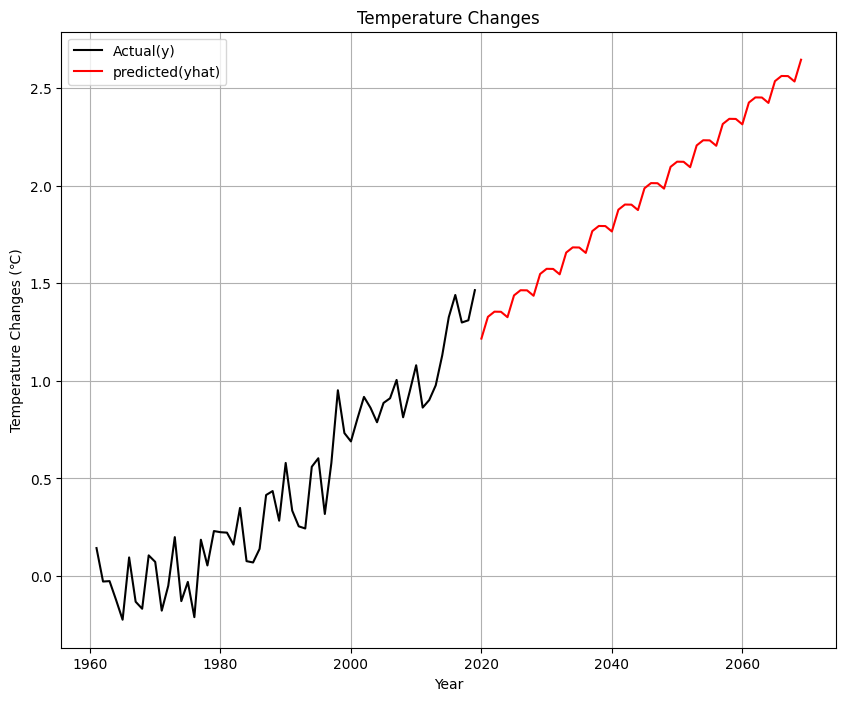

In [132]:
# ploting both the current  and the predicted
fig, ax = plt.subplots(figsize=(10, 8))

outResult.plot(kind='line', x='ds', y='y', label='Actual(y)', color='black', ax=ax)
outResult.plot(kind='line', x='ds', y='yhat', label='predicted(yhat)', color='red', ax=ax)
ax.set_title('Temperature Changes')
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Temperature Changes (℃)', fontsize=10)
ax.grid(True)
fig.show()

# Conclusion
- According to the chart above the prediction of the temperature seams to keep on rising making a prediction of worse climate in the future
- Expected changes may be increase in temperature, irregular rain seasons and worst case increase in drought and famine in the continent